# Sistem Klasifikasi Ikan dengan Regresi Logistik



In [17]:
# Library yang dibutuhkan

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
import os 

%matplotlib inline

In [64]:
# Parameter-parameter Data Latih.
jumlah_kelas = 5 # jenis ikan 0 sd 4
jumlah_fitur = 10000 # 100*100

# Parameter pelatihan.
kecepatan_pembelajaran = 0.01
langkah_pelatihan = 10
ukuran_batch = 256
tampilkan_langkah = 5

In [19]:
# Panggil Dataset (Data Latih)
# Urutan Data Ikan
# komet
# maanfish
# molly
# redfine
# zebra

dir_komet = "./Dataset/training-data/komet/*.jpg"
dir_maanfish = "./Dataset/training-data/maanfish/*.jpg"
dir_molly = "./Dataset/training-data/molly/*.jpg"
dir_redfine = "./Dataset/training-data/redfine/*.jpg"
dir_zebra = "./Dataset/training-data/zebra/*.jpg"
  
files = glob.glob(dir_komet) 
komet = []
for f1 in files: 
    img = cv2.imread(f1) 
    komet.append(img) 

files = glob.glob(dir_maanfish) 
maanfish = []
for f1 in files: 
    img = cv2.imread(f1) 
    maanfish.append(img) 

files = glob.glob(dir_molly) 
molly = []
for f1 in files: 
    img = cv2.imread(f1) 
    molly.append(img) 

files = glob.glob(dir_redfine) 
redfine = []
for f1 in files: 
    img = cv2.imread(f1) 
    redfine.append(img) 

files = glob.glob(dir_zebra) 
zebra = []
for f1 in files: 
    img = cv2.imread(f1) 
    zebra.append(img) 
    
# Panggil Dataset (Data Uji)
dir_komet_uji = "./Dataset/testing-data/komet/*.jpg"
dir_maanfish_uji = "./Dataset/testing-data/maanfish/*.jpg"
dir_molly_uji = "./Dataset/testing-data/molly/*.jpg"
dir_redfine_uji = "./Dataset/testing-data/redfine/*.jpg"
dir_zebra_uji = "./Dataset/testing-data/zebra/*.jpg"

files = glob.glob(dir_komet_uji) 
komet_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    komet_uji.append(img) 

files = glob.glob(dir_maanfish_uji) 
maanfish_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    maanfish_uji.append(img) 

files = glob.glob(dir_molly_uji) 
molly_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    molly_uji.append(img) 

files = glob.glob(dir_redfine_uji) 
redfine_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    redfine_uji.append(img) 

files = glob.glob(dir_zebra_uji) 
zebra_uji = []
for f1 in files: 
    img = cv2.imread(f1) 
    zebra_uji.append(img) 


In [20]:
# Cek ukuran Data latih
[np.shape(komet), np.shape(maanfish), np.shape(molly), np.shape(redfine), np.shape(zebra)]

[(40, 100, 100, 3),
 (40, 100, 100, 3),
 (40, 100, 100, 3),
 (40, 100, 100, 3),
 (40, 100, 100, 3)]

In [21]:
# Cek ukuran Data Uji
[np.shape(komet_uji), np.shape(maanfish_uji), np.shape(molly_uji), np.shape(redfine_uji), np.shape(zebra_uji)]

[(10, 100, 100, 3),
 (10, 100, 100, 3),
 (10, 100, 100, 3),
 (10, 100, 100, 3),
 (10, 100, 100, 3)]

In [22]:
# Data Latih semua jenis ikan digabung
X = np.vstack((komet, maanfish, molly, redfine, zebra)).astype(np.float32)                        


In [23]:
# Cek ukuran Data Latih setelah digabung
X.shape

(200, 100, 100, 3)

In [24]:
# Tampilkan sebelum dinormalisasi
print(X)

[[[[ 66.  46.   5.]
   [ 56.  40.   0.]
   [ 63.  52.   2.]
   ...
   [ 59.  35.   0.]
   [ 59.  42.   0.]
   [105.  90.  27.]]

  [[ 65.  43.   1.]
   [ 59.  40.   0.]
   [ 64.  51.   0.]
   ...
   [ 55.  33.   0.]
   [ 57.  40.   0.]
   [100.  87.  25.]]

  [[ 69.  45.   0.]
   [ 68.  46.   0.]
   [ 69.  52.   0.]
   ...
   [ 54.  33.   0.]
   [ 56.  40.   0.]
   [ 99.  88.  28.]]

  ...

  [[167. 181. 200.]
   [181. 195. 214.]
   [174. 188. 207.]
   ...
   [135. 142. 162.]
   [166. 175. 195.]
   [161. 170. 190.]]

  [[184. 198. 216.]
   [205. 219. 237.]
   [206. 220. 238.]
   ...
   [199. 208. 228.]
   [149. 158. 178.]
   [211. 222. 242.]]

  [[185. 199. 217.]
   [208. 222. 240.]
   [213. 227. 245.]
   ...
   [226. 235. 255.]
   [174. 185. 205.]
   [192. 203. 223.]]]


 [[[ 41.  30.  33.]
   [ 41.  30.  33.]
   [ 41.  30.  33.]
   ...
   [ 48.  34.  36.]
   [ 42.  34.  34.]
   [ 38.  33.  32.]]

  [[ 39.  34.  36.]
   [ 39.  34.  36.]
   [ 39.  34.  36.]
   ...
   [ 36.  27.  30.]
 

In [25]:
# Data Latih semua jenis ikan Dinormalisasi

X = X / 255.0


In [26]:
X.shape

(200, 100, 100, 3)

In [27]:
len(komet)

40

In [28]:
# Tampilkan setelah dinormalisasi
print(X)

[[[[0.25882354 0.18039216 0.01960784]
   [0.21960784 0.15686275 0.        ]
   [0.24705882 0.20392157 0.00784314]
   ...
   [0.23137255 0.13725491 0.        ]
   [0.23137255 0.16470589 0.        ]
   [0.4117647  0.3529412  0.10588235]]

  [[0.25490198 0.16862746 0.00392157]
   [0.23137255 0.15686275 0.        ]
   [0.2509804  0.2        0.        ]
   ...
   [0.21568628 0.12941177 0.        ]
   [0.22352941 0.15686275 0.        ]
   [0.39215687 0.34117648 0.09803922]]

  [[0.27058825 0.1764706  0.        ]
   [0.26666668 0.18039216 0.        ]
   [0.27058825 0.20392157 0.        ]
   ...
   [0.21176471 0.12941177 0.        ]
   [0.21960784 0.15686275 0.        ]
   [0.3882353  0.34509805 0.10980392]]

  ...

  [[0.654902   0.70980394 0.78431374]
   [0.70980394 0.7647059  0.8392157 ]
   [0.68235296 0.7372549  0.8117647 ]
   ...
   [0.5294118  0.5568628  0.63529414]
   [0.6509804  0.6862745  0.7647059 ]
   [0.6313726  0.6666667  0.74509805]]

  [[0.72156864 0.7764706  0.84705883]
   [0.8

In [29]:
# Data Uji semua jenis ikan digabung
X_uji = np.vstack((komet_uji, maanfish_uji, molly_uji, redfine_uji, zebra_uji)).astype(np.float32)                        


In [30]:
# Cek ukuran Data Uji
X_uji.shape

(50, 100, 100, 3)

In [31]:
# Data Uji sebelum dinormalisasi
print(X_uji)

[[[[ 48.  17.   2.]
   [ 48.  17.   2.]
   [ 48.  17.   2.]
   ...
   [ 16.  38.  86.]
   [  4.  24.  72.]
   [  2.  22.  69.]]

  [[ 48.  17.   2.]
   [ 48.  17.   2.]
   [ 48.  17.   2.]
   ...
   [  5.  27.  75.]
   [  0.  21.  69.]
   [  4.  27.  73.]]

  [[ 48.  17.   2.]
   [ 48.  17.   2.]
   [ 48.  17.   2.]
   ...
   [  3.  26.  74.]
   [  1.  27.  74.]
   [  7.  33.  80.]]

  ...

  [[ 55.  24.   0.]
   [ 55.  24.   0.]
   [ 55.  24.   0.]
   ...
   [ 15.   5.   0.]
   [ 26.   9.   0.]
   [ 37.  17.   6.]]

  [[ 55.  24.   0.]
   [ 55.  24.   0.]
   [ 55.  24.   0.]
   ...
   [ 15.   5.   0.]
   [ 26.   9.   0.]
   [ 37.  17.   6.]]

  [[ 55.  24.   0.]
   [ 55.  24.   0.]
   [ 55.  24.   0.]
   ...
   [ 15.   5.   0.]
   [ 26.   9.   0.]
   [ 37.  17.   6.]]]


 [[[ 87.  12.   4.]
   [ 87.  12.   4.]
   [ 87.  12.   4.]
   ...
   [ 72.  12.   6.]
   [ 72.  12.   6.]
   [ 70.  12.   6.]]

  [[ 87.  12.   4.]
   [ 87.  12.   4.]
   [ 87.  12.   4.]
   ...
   [ 74.  12.   6.]
 

In [32]:
# Data Uji semua jenis ikan Dinormalisasi

X_uji = X_uji / 255.0


In [33]:
# Cek setelah dinormalisasi
print(X_uji)

[[[[0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   ...
   [0.0627451  0.14901961 0.3372549 ]
   [0.01568628 0.09411765 0.28235295]
   [0.00784314 0.08627451 0.27058825]]

  [[0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   ...
   [0.01960784 0.10588235 0.29411766]
   [0.         0.08235294 0.27058825]
   [0.01568628 0.10588235 0.28627452]]

  [[0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   [0.1882353  0.06666667 0.00784314]
   ...
   [0.01176471 0.10196079 0.2901961 ]
   [0.00392157 0.10588235 0.2901961 ]
   [0.02745098 0.12941177 0.3137255 ]]

  ...

  [[0.21568628 0.09411765 0.        ]
   [0.21568628 0.09411765 0.        ]
   [0.21568628 0.09411765 0.        ]
   ...
   [0.05882353 0.01960784 0.        ]
   [0.10196079 0.03529412 0.        ]
   [0.14509805 0.06666667 0.02352941]]

  [[0.21568628 0.09411765 0.        ]
   [0.2

In [34]:
# Label ikan Data Latih
label_komet    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_maanfish = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label_molly    = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
label_redfine  = np.array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
label_zebra    = np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [35]:
# Cek ukuran label Data Latih
[np.shape(label_komet), np.shape(label_maanfish), np.shape(label_molly), np.shape(label_redfine), np.shape(label_zebra)]

[(40,), (40,), (40,), (40,), (40,)]

In [36]:
# Semua Label Ikan Data Latih digabung
y = np.hstack((label_komet, label_maanfish, label_molly, label_redfine, label_zebra))

In [37]:
# Cek ukuran label ikan Data Latih
y.shape

(200,)

In [38]:
# Label ikan Data Uji
label_komet_uji    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_maanfish_uji = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
label_molly_uji    = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
label_redfine_uji  = np.array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
label_zebra_uji    = np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [39]:
# Cek ukuran label Data Uji
[np.shape(label_komet_uji), np.shape(label_maanfish_uji), np.shape(label_molly_uji), np.shape(label_redfine_uji), np.shape(label_zebra_uji)]

[(10,), (10,), (10,), (10,), (10,)]

In [40]:
# Semua Label Ikan Data Uji digabung
y_uji = np.hstack((label_komet_uji, label_maanfish_uji, label_molly_uji, label_redfine_uji, label_zebra_uji))

In [41]:
# Cek ukuran label ikan Data Uji
y_uji.shape

(50,)

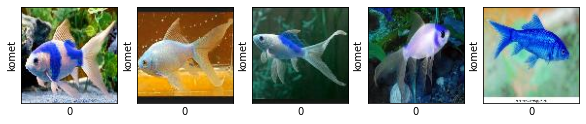

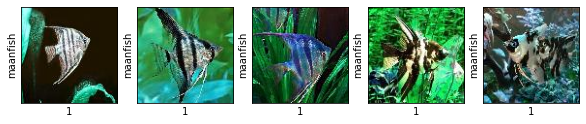

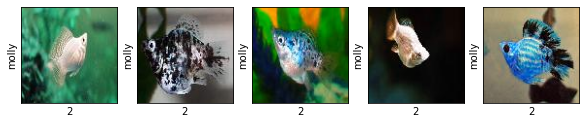

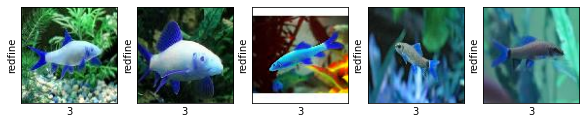

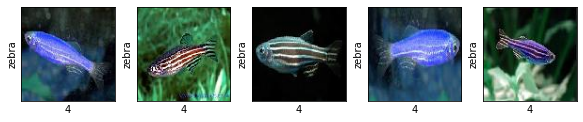

In [42]:
# Tampilkan sampel Data Latih

class_names = ['komet', 'maanfish','molly','redfine','zebra']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(komet[i], cmap=plt.cm.binary)
    plt.xlabel(label_komet[i])
    plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maanfish[i], cmap=plt.cm.binary)
    plt.xlabel(label_maanfish[i])
    plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(molly[i], cmap=plt.cm.binary)
    plt.xlabel(label_molly[i])
    plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(redfine[i], cmap=plt.cm.binary)
    plt.xlabel(label_redfine[i])
    plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(zebra[i], cmap=plt.cm.binary)
    plt.xlabel(label_zebra[i])
    plt.ylabel(class_names[4])
plt.show()


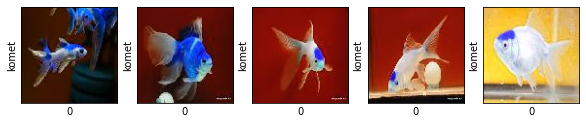

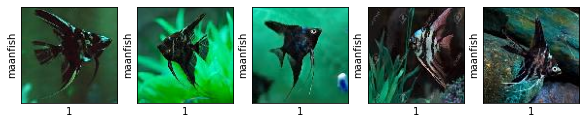

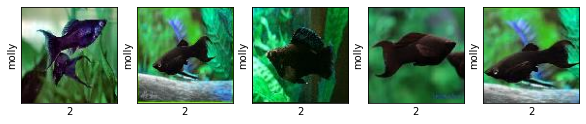

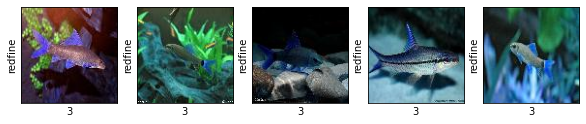

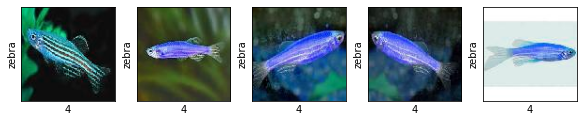

In [43]:
# Tampilkan sampel Data Uji

class_names = ['komet', 'maanfish','molly','redfine','zebra']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(komet_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_komet_uji[i])
    plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maanfish_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_maanfish_uji[i])
    plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(molly_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_molly_uji[i])
    plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(redfine_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_redfine_uji[i])
    plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(zebra_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_zebra_uji[i])
    plt.ylabel(class_names[4])
plt.show()


In [61]:
X.shape

(200, 100, 100, 3)

In [62]:
y.shape

(200,)

In [68]:
# Ratakan gambar ke vektor 1-D dari 10000 fitur (100*100).
x_train, x_test = X.reshape([-1, jumlah_fitur]), X_uji.reshape([-1, jumlah_fitur])


In [69]:
x_train.shape


(600, 10000)

In [70]:
x_test.shape

(150, 10000)